In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv('HomeCredit_columns_description.csv')
df.head()

,0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   0            219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB


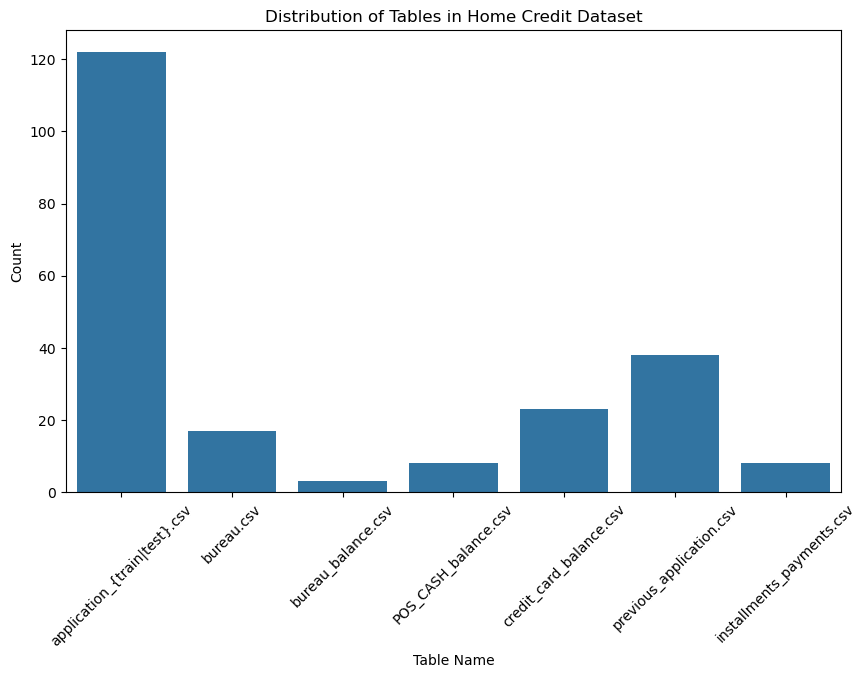

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Table')
plt.title('Distribution of Tables in Home Credit Dataset')  
plt.xlabel('Table Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

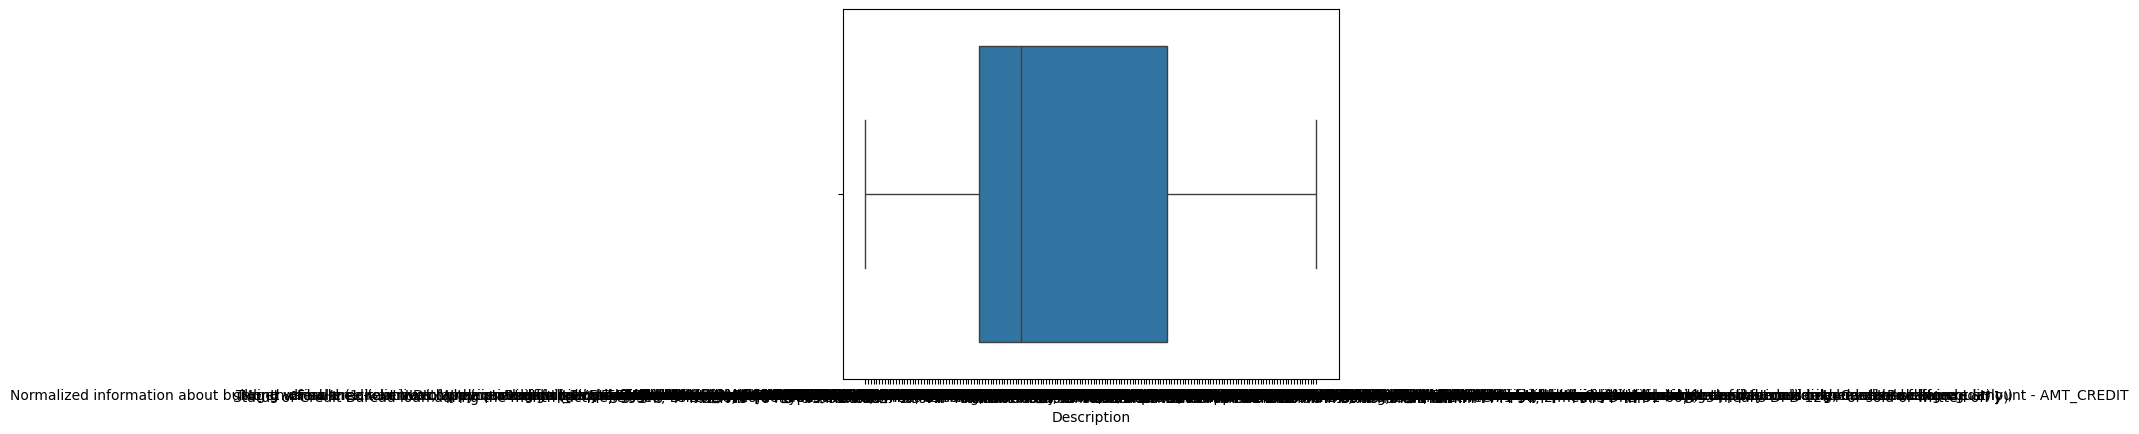

In [25]:
#verification des valeurs aberantes
sns.boxplot(data=df, x='Description')
#plt.title('Boxplot of Description Lengths')
#plt.ylabel('Length of Description')
#plt.show()